<a href="https://colab.research.google.com/github/junhaogu/zlineSegment/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
git clone https://github.com/junhaogu/zlineSegTest.git

Cloning into 'zlineSegTest'...


cpu


Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


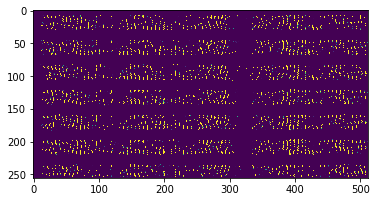

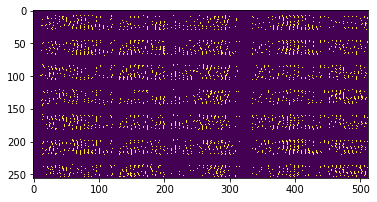

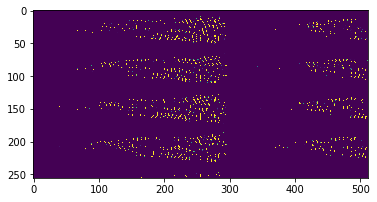

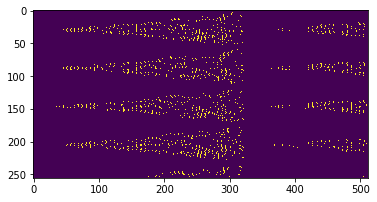

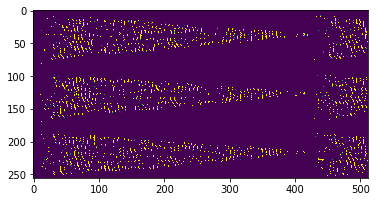

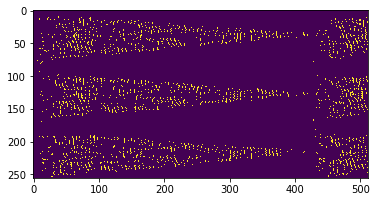

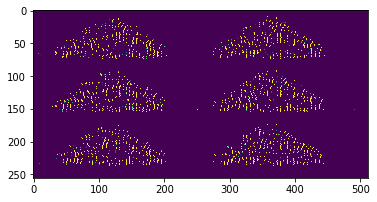

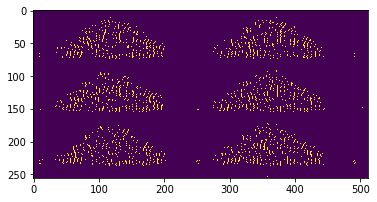

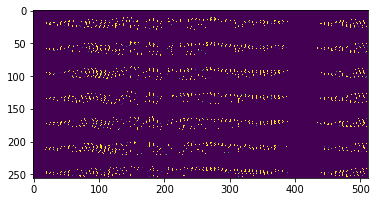

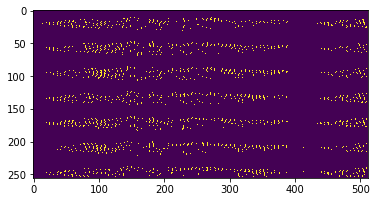

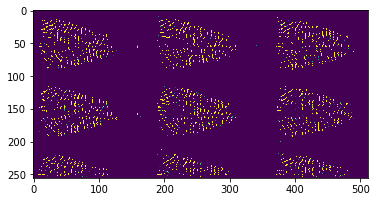

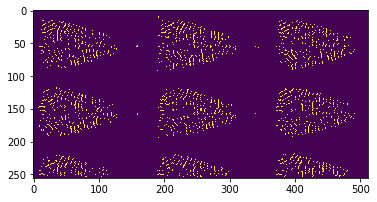

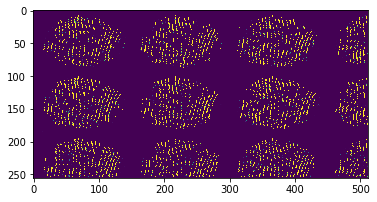

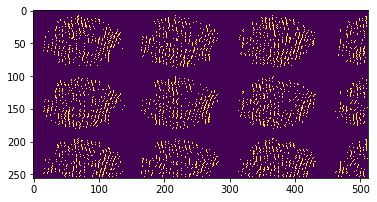

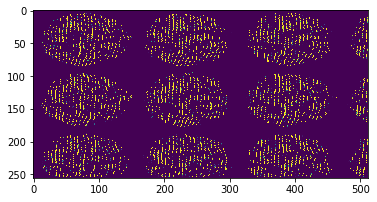

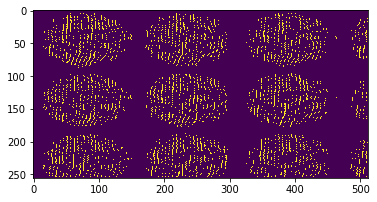

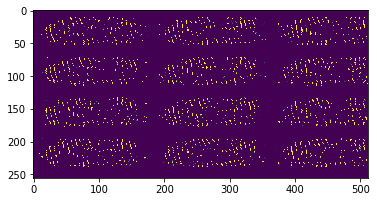

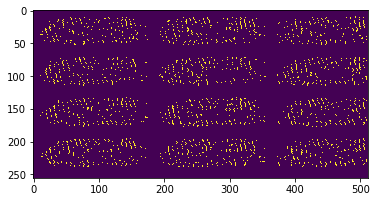

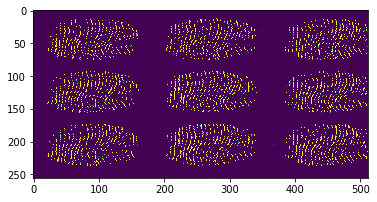

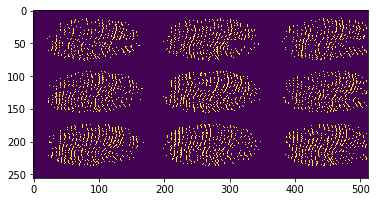

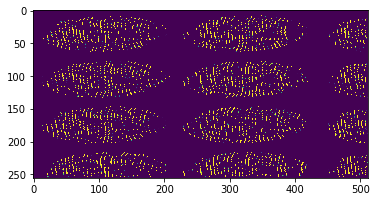

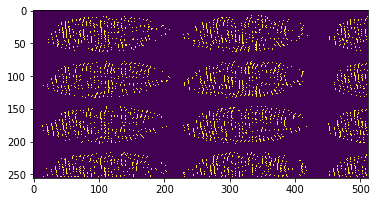

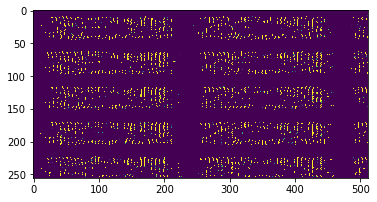

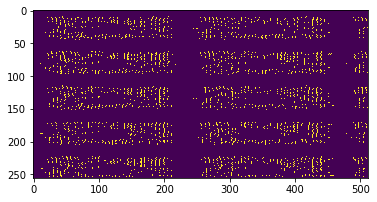

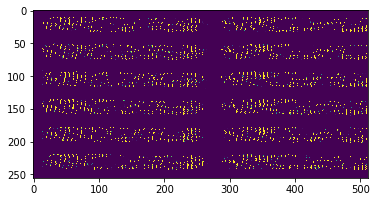

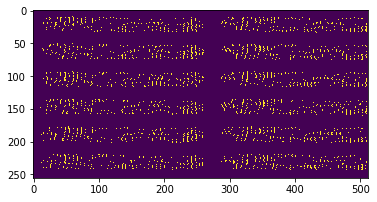

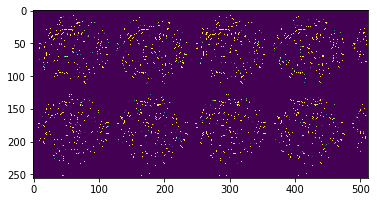

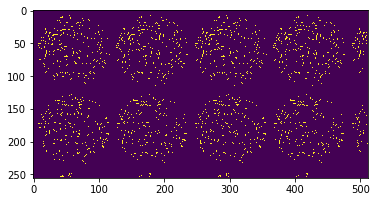

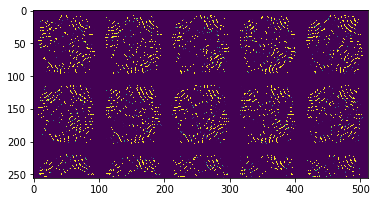

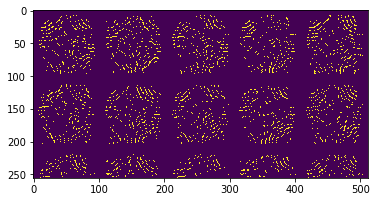

In [7]:
import torch
import glob
import torch
import os
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

img_dir = '/content/zlineSegTest/overlay'  
data_path = os.path.join(img_dir,'*.tif')
files = glob.glob(data_path)
files.sort()
sample_data = torch.zeros([1,3,256,512]).type(torch.FloatTensor)
temp=torch.zeros([1,3,256,512]).type(torch.FloatTensor)
counter=0
for f1 in files:
  img=Image.open(f1)
  img=img-np.mean(img)
  imgTensor=transforms.ToTensor()(img).type(torch.FloatTensor)
  sample_data=torch.cat((sample_data, imgTensor[None,:,:,:]),0)   
sample_data=sample_data[1:,:,:,:]
from matplotlib import pyplot as plt
plt.imshow(sample_data[0][1,:,:])

segment_dir = '/content/zlineSegTest/mask'
data_path1 = os.path.join(segment_dir,'*.tif')
files1 = glob.glob(data_path1)
files1.sort()
mask = torch.zeros([1,1,256,512]).type(torch.float)
temp = torch.zeros([1,1,256,512]).type(torch.float)
counter=0
for f1 in files1:
  img=Image.open(f1)
  img=img.convert('1')
  imgTensor=transforms.ToTensor()(img).type(torch.float)
  mask=torch.cat((mask,imgTensor[None,:,:,:]),0)
mask=mask[1:,:,:,:]
plt.imshow(mask[0][0,:,:])

model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet', in_channels=3, out_channels=1, init_features=32, pretrained=False).to(device)
model_read_name ='unet_cell_32features.pt'
model_path='/content/zlineSegTest/unet_32features.pt'
checkpoint=torch.load(model_path,map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)

model.eval()
for i in range(sample_data.shape[0]):
  prediction=model(sample_data[i][None,:,:,:])
  plt.imshow(prediction[0][0,:,:].detach().numpy())
  plt.show()
  plt.imshow(mask[i][0,:,:])
  plt.show()